In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, classification_report
from sklearn.metrics import auc, ConfusionMatrixDisplay, roc_curve, RocCurveDisplay
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv('UCI_Credit_Card.csv')

In [3]:
#Metadata of the attributes

#ID: ID of each client
#LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
#SEX: Gender (1=male, 2=female)
#EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
#MARRIAGE: Marital status (1=married, 2=single, 3=others)
#AGE: Age in years
#PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
#PAY_2: Repayment status in August, 2005 (scale same as above)
#PAY_3: Repayment status in July, 2005 (scale same as above)
#PAY_4: Repayment status in June, 2005 (scale same as above)
#PAY_5: Repayment status in May, 2005 (scale same as above)
#PAY_6: Repayment status in April, 2005 (scale same as above)
#BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
#BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
#BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
#BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
#BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
#BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
#PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
#PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
#PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
#PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
#PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
#PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
#default.payment.next.month: Default payment (1=yes, 0=no)

In [4]:
df.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [6]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [7]:
#Data Cleaning

In [8]:
df.duplicated().sum()

0

In [9]:
df['ID'].is_unique

True

In [10]:
df.LIMIT_BAL.describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

In [11]:
# Categorical variables description
df[['SEX', 'EDUCATION', 'MARRIAGE','AGE']].describe()

,SEX,EDUCATION,MARRIAGE,AGE
count,30000.000000,30000.000000,30000.000000,30000.000000
mean,1.603733,1.853133,1.551867,35.485500
std,0.489129,0.790349,0.521970,9.217904
min,1.000000,0.000000,0.000000,21.000000
25%,1.000000,1.000000,1.000000,28.000000
50%,2.000000,2.000000,2.000000,34.000000
75%,2.000000,2.000000,2.000000,41.000000
max,2.000000,6.000000,3.000000,79.000000


In [12]:
#cleaning EDUCATION which having 0 and 5,6 which is not labelled and MARRIAGE having 0 which is not labelled

#replace 0,5,6 into median of the data to prevent outlier
df['EDUCATION'].replace({0:2,1:1,2:2,3:3,4:4,5:2,6:2}, inplace=True)
df.EDUCATION.value_counts()


EDUCATION
2    14375
1    10585
3     4917
4      123
Name: count, dtype: int64

In [13]:
#replace 0 into median of the data to prevent outlier
df['MARRIAGE'].replace({0:2,1:1,2:2,3:3}, inplace=True)
df.MARRIAGE.value_counts()

MARRIAGE
2    16018
1    13659
3      323
Name: count, dtype: int64

In [14]:
# Payment delay description
#(-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, …
# 8=payment delay for eight months, 9=payment delay for nine months and above)
df = df.rename(columns={'PAY_0': 'PAY_1'})
df[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [15]:
#replace -1,-2,0 in PAY_n into 0 to represents pay duly 
df['PAY_1'].replace({-2:0,-1:0}, inplace=True)
df['PAY_2'].replace({-2:0,-1:0}, inplace=True)
df['PAY_3'].replace({-2:0,-1:0}, inplace=True)
df['PAY_4'].replace({-2:0,-1:0}, inplace=True)
df['PAY_5'].replace({-2:0,-1:0}, inplace=True)
df['PAY_6'].replace({-2:0,-1:0}, inplace=True)

In [16]:
# Bill Statement description
df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In [17]:
#Previous Payment Description
df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [18]:
#Default Payment Description
df['default.payment.next.month'].value_counts()

default.payment.next.month
0    23364
1     6636
Name: count, dtype: int64

<Axes: xlabel='SEX'>

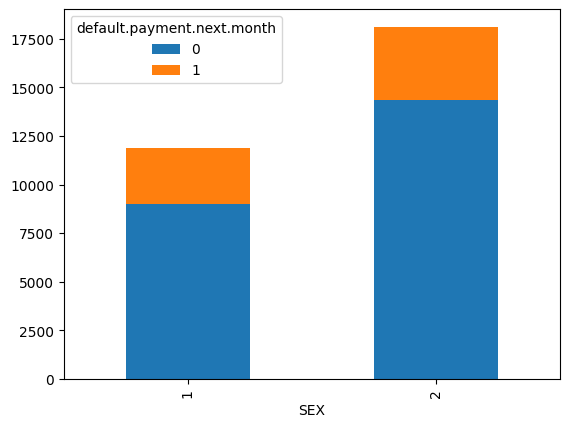

In [19]:
#EDA 

#SEX and their default payment next month
gender = df.groupby(['SEX','default.payment.next.month']).size().unstack()
gender.plot(kind = 'bar', stacked= True)


In [20]:
#create function to find the percentage of each attribute
def corr_2_cols(Col1, Col2):
    res = df.groupby([Col1, Col2]).size().unstack()
    res['perc'] = (res[res.columns[1]]/(res[res.columns[0]] + res[res.columns[1]]))
    return res

In [21]:
corr_2_cols('SEX','default.payment.next.month')

default.payment.next.month,0,1,perc
SEX,,,
1,9015,2873,0.241672
2,14349,3763,0.207763


<Axes: xlabel='EDUCATION'>

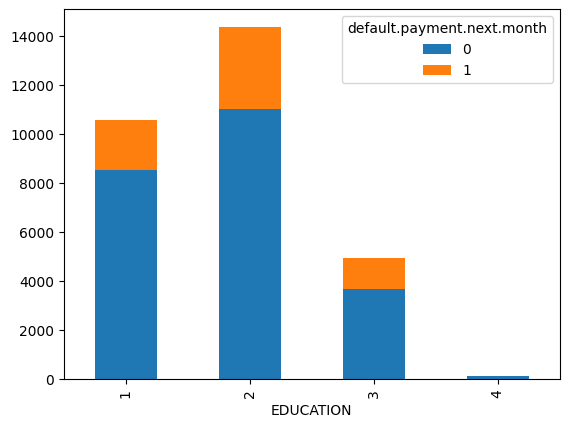

In [22]:
#SEX and their default payment next month
edu = df.groupby(['EDUCATION','default.payment.next.month']).size().unstack()
edu.plot(kind = 'bar', stacked= True)

In [23]:
corr_2_cols('EDUCATION','default.payment.next.month')

default.payment.next.month,0,1,perc
EDUCATION,,,
1,8549,2036,0.192348
2,11019,3356,0.233461
3,3680,1237,0.251576
4,116,7,0.056911


/Users/tf/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Age Distribution')

<Figure size 600x600 with 0 Axes>

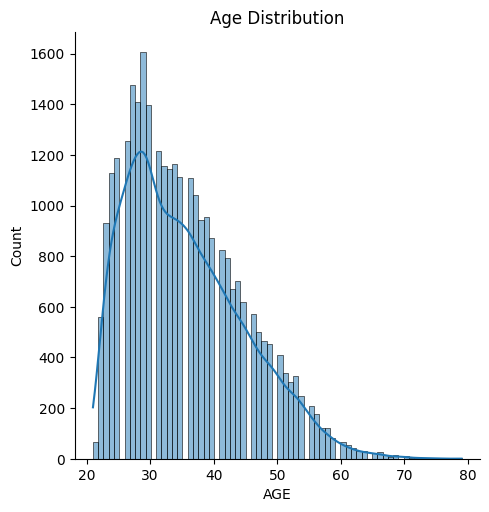

In [24]:
# AGE distribution 
plt.figure(figsize=(6,6))
sns.displot(df['AGE'], kde=True)
#plt.xticks(rotation=0)
plt.ylabel('Count')
plt.title("Age Distribution")

Text(0.5, 1.0, 'Class Distribution')

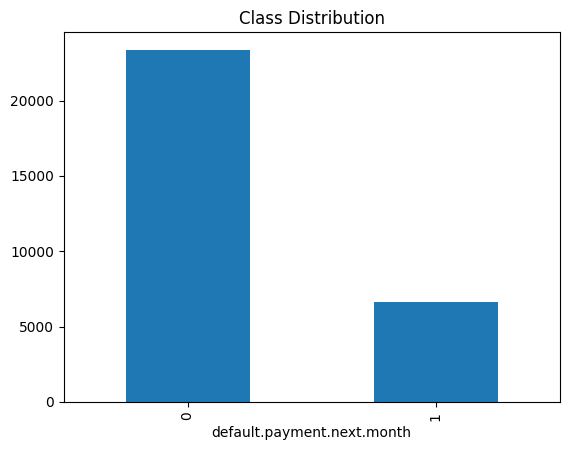

In [25]:
#check class imbalance 

df['default.payment.next.month'].value_counts().plot(kind="bar")
plt.title("Class Distribution")

In [26]:
#SMOTE (increase the minority)
temp = pd.get_dummies(df)
X = temp.drop(columns = ['ID', 'default.payment.next.month'], axis = 1)
y = temp['default.payment.next.month']

smt = imblearn.over_sampling.SMOTE(sampling_strategy="minority", random_state=42, k_neighbors=5)

X_res, y_res = smt.fit_resample(X, y)
df2 = pd.concat([X_res, y_res], axis=1, sort=False)
df2 

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.000000,2,2,1,24,2,2,0,0,0,...,0.000000,0.000000,0.000000,0.000000,689.000000,0.000000,0.000000,0.000000,0.000000,1
1,120000.000000,2,2,2,26,0,2,0,0,0,...,3272.000000,3455.000000,3261.000000,0.000000,1000.000000,1000.000000,1000.000000,0.000000,2000.000000,1
2,90000.000000,2,2,2,34,0,0,0,0,0,...,14331.000000,14948.000000,15549.000000,1518.000000,1500.000000,1000.000000,1000.000000,1000.000000,5000.000000,0
3,50000.000000,2,2,1,37,0,0,0,0,0,...,28314.000000,28959.000000,29547.000000,2000.000000,2019.000000,1200.000000,1100.000000,1069.000000,1000.000000,0
4,50000.000000,1,2,1,57,0,0,0,0,0,...,20940.000000,19146.000000,19131.000000,2000.000000,36681.000000,10000.000000,9000.000000,689.000000,679.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,462164.268649,1,1,1,41,1,1,3,3,3,...,3401.179283,2375.315944,1955.014972,294.124109,1655.665516,1446.164311,420.300972,0.000000,1270.425697,1
46724,35576.497730,1,1,2,23,0,0,0,0,0,...,12672.613622,7794.437831,4339.875461,724.944705,1759.975670,620.240505,304.412443,342.084239,154.468987,1
46725,262277.075863,1,1,1,33,1,1,1,1,1,...,176985.751580,179204.686146,183003.869208,11316.877241,2864.651035,16945.592209,6132.419972,6201.990069,6045.222621,1
46726,278870.779545,1,2,1,38,0,0,0,0,0,...,5259.299131,4093.989610,3481.169948,3575.431889,5368.352620,5285.282833,4113.892986,3497.831182,3121.627322,1


Text(0.5, 1.0, 'Class Distribution')

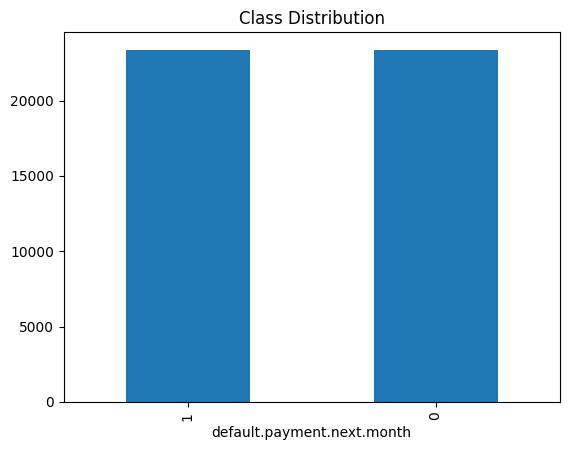

In [27]:
df2['default.payment.next.month'].value_counts().plot(kind="bar")
plt.title("Class Distribution")

In [28]:
# Independnet features
X = df2.drop(['default.payment.next.month'], axis=1)
# Dependent feature
y = df2['default.payment.next.month']

In [29]:
#standard scale the values

scaler= StandardScaler()
X= scaler.fit_transform(X)

In [30]:
#create train and test dataset
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.20,random_state=42)

In [31]:
#Logistic Regression 
logit = LogisticRegression()
logit.fit(X_train, y_train)

LogisticRegression()

In [32]:
pred_logit = logit.predict(X_test)

In [33]:
#Evualuation metrics

print("The accuracy of Logi Regr model is:", accuracy_score(y_test, pred_logit))
print(classification_report(y_test, pred_logit))


The accuracy of Logi Regr model is: 0.717847207361438
              precision    recall  f1-score   support

           0       0.70      0.76      0.73      4664
           1       0.74      0.67      0.71      4682

    accuracy                           0.72      9346
   macro avg       0.72      0.72      0.72      9346
weighted avg       0.72      0.72      0.72      9346



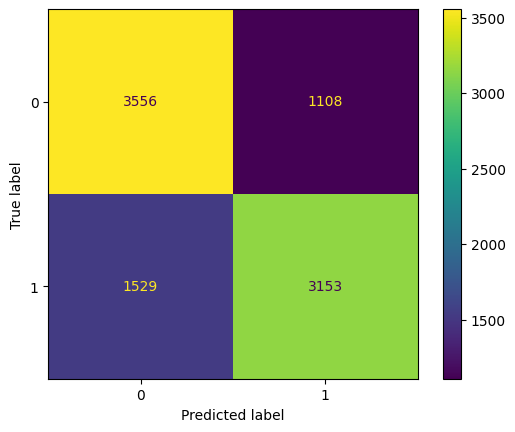

In [34]:
cm = confusion_matrix(y_test, pred_logit)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

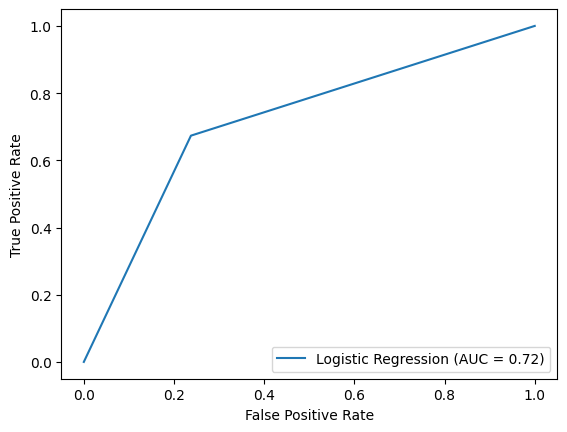

In [35]:
fpr, tpr, thresholds = roc_curve(y_test, pred_logit)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logistic Regression')
display.plot()
plt.show()

In [36]:
## Random Forest Classifier 
rf = RandomForestClassifier()
# Fitting the model
rf.fit(X_train,y_train)

RandomForestClassifier()

In [37]:
pred_rf= rf.predict(X_test)

In [38]:
print("The accuracy of RF model is:", accuracy_score(y_test, pred_rf))
print(classification_report(y_test,pred_rf ))

The accuracy of RF model is: 0.8341536486197304
              precision    recall  f1-score   support

           0       0.81      0.87      0.84      4664
           1       0.86      0.80      0.83      4682

    accuracy                           0.83      9346
   macro avg       0.84      0.83      0.83      9346
weighted avg       0.84      0.83      0.83      9346



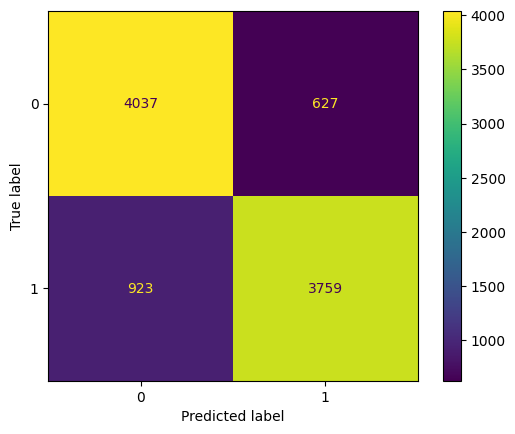

In [39]:
cm = confusion_matrix(y_test, pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

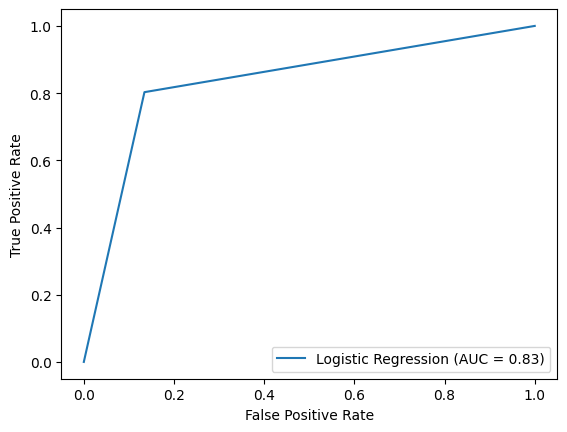

In [40]:
fpr, tpr, thresholds = roc_curve(y_test, pred_rf)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logistic Regression')
display.plot()
plt.show()

In [41]:
xgb_clf= xgb.XGBClassifier()
#fitting the model
xgb_clf.fit(X_train,y_train)

## Predicting the model
xgb_predict= xgb_clf.predict(X_test)

print("The accuracy of XGB model is:", accuracy_score(y_test, xgb_predict))
print(classification_report(y_test, xgb_predict))

The accuracy of XGB model is: 0.8164990370211855
              precision    recall  f1-score   support

           0       0.80      0.85      0.82      4664
           1       0.84      0.78      0.81      4682

    accuracy                           0.82      9346
   macro avg       0.82      0.82      0.82      9346
weighted avg       0.82      0.82      0.82      9346



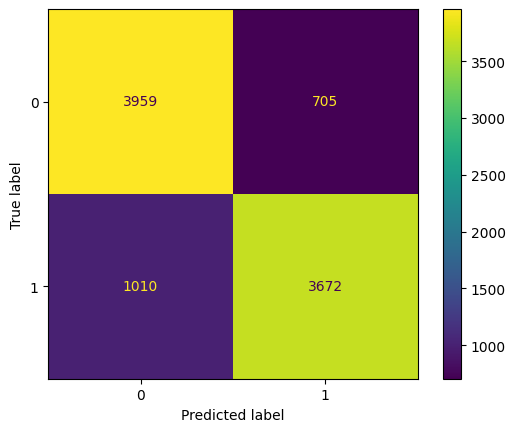

In [42]:
cm = confusion_matrix(y_test, xgb_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

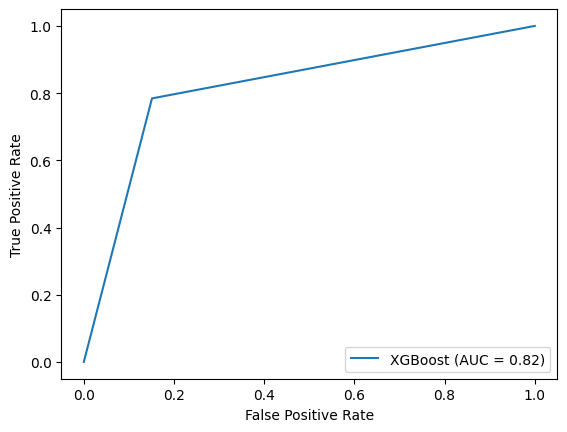

In [43]:
fpr, tpr, thresholds = roc_curve(y_test, xgb_predict)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='XGBoost')
display.plot()
plt.show()

In [44]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [45]:
## Hyperparameter optimization using RandomizedSearchCV
random_search=RandomizedSearchCV(xgb_clf,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

# fitting the RandomizedSearchCV
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 2/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.25, max_depth=8, min_child_weight=1;, score=0.911 total time=   1.2s
[CV 3/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.25, max_depth=8, min_child_weight=1;, score=0.900 total time=   1.3s
[CV 5/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.25, max_depth=8, min_child_weight=1;, score=0.897 total time=   1.3s
[CV 4/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.25, max_depth=8, min_child_weight=1;, score=0.902 total time=   1.3s
[CV 1/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.25, max_depth=8, min_child_weight=1;, score=0.904 total time=   1.3s
[CV 1/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.3, max_depth=10, min_child_weight=1;, score=0.913 total time=   3.1s
[CV 2/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.3, max_depth=10, min_child_weight=1;, score=0.917 total time=   3.2s
[CV 3/5] END colsample_

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [46]:
# Finding the best estimators
random_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [47]:
#Finding the best parameters
random_search.best_params_

{'min_child_weight': 1,
 'max_depth': 10,
 'learning_rate': 0.3,
 'gamma': 0.1,
 'colsample_bytree': 0.7}

In [48]:
classifier = xgb.XGBClassifier(objective='binary:logistic', 
                               gamma=0.3, 
                               learning_rate=0.1, 
                               max_depth=15,
                               #reg_lambda=10,
                               min_child_weight=3,
                               #subsample=0.9, 
                               colsample_bytree=0.4,
                               #use_label_encoder=False
                               )

# Fitting the model
classifier.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [49]:
# Predicting model
y_pred = classifier.predict(X_test)

In [50]:
print("The accuracy of the Optimised XGBoost model is:", accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

The accuracy of the Optimised XGBoost model is: 0.8414294885512519
              precision    recall  f1-score   support

           0       0.82      0.87      0.85      4664
           1       0.86      0.82      0.84      4682

    accuracy                           0.84      9346
   macro avg       0.84      0.84      0.84      9346
weighted avg       0.84      0.84      0.84      9346



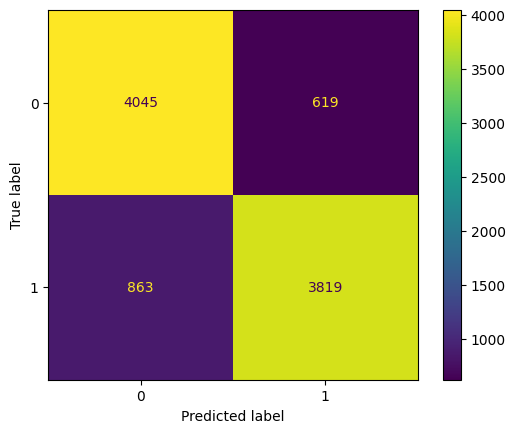

In [51]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

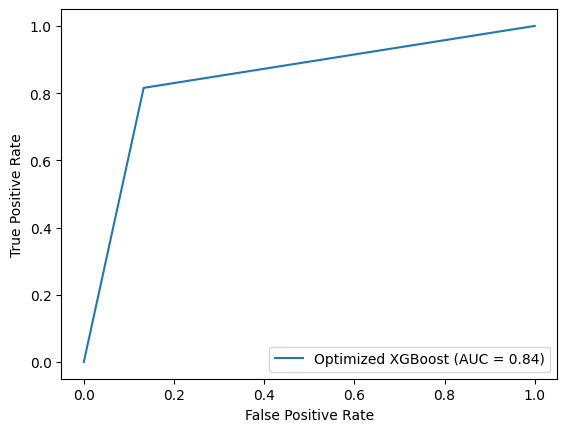

In [52]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Optimized XGBoost')
display.plot()
plt.show()

In [53]:
## SVC 
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100],
              'kernel': ['rbf']} 

In [54]:
grid_clf = GridSearchCV(SVC(probability=True), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV 3/3] END ...................C=1, kernel=rbf;, score=0.750 total time= 6.9min
[CV 1/3] END ...................C=1, kernel=rbf;, score=0.759 total time= 7.0min
[CV 2/3] END ...................C=1, kernel=rbf;, score=0.756 total time= 7.0min
[CV 3/3] END .................C=0.1, kernel=rbf;, score=0.735 total time= 7.0min
[CV 1/3] END .................C=0.1, kernel=rbf;, score=0.743 total time= 7.2min
[CV 2/3] END .................C=0.1, kernel=rbf;, score=0.742 total time= 7.2min
[CV 2/3] END ..................C=10, kernel=rbf;, score=0.767 total time= 7.8min
[CV 1/3] END ..................C=10, kernel=rbf;, score=0.770 total time= 7.9min
[CV 3/3] END ..................C=10, kernel=rbf;, score=0.760 total time= 3.9min
[CV 3/3] END .................C=100, kernel=rbf;, score=0.757 total time= 6.7min
[CV 2/3] END .................C=100, kernel=rbf;, score=0.771 total time= 6.7min
[CV 1/3] END .................C=100, kernel=rbf;,

GridSearchCV(cv=3, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'kernel': ['rbf']},
             scoring='accuracy', verbose=3)

In [55]:
optimal_SVC_clf = grid_clf.best_estimator_

In [56]:
grid_clf.best_params_

{'C': 10, 'kernel': 'rbf'}

In [57]:
# Get the predicted classes
train_class_preds = optimal_SVC_clf.predict(X_train)
test_class_preds = optimal_SVC_clf.predict(X_test)

In [58]:
# Get the accuracy scores
train_accuracy_SVC = accuracy_score(train_class_preds,y_train)
test_accuracy_SVC = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_SVC)
print("The accuracy on test data is ", test_accuracy_SVC)

The accuracy on train data is  0.79688085174683
The accuracy on test data is  0.7594692916755832


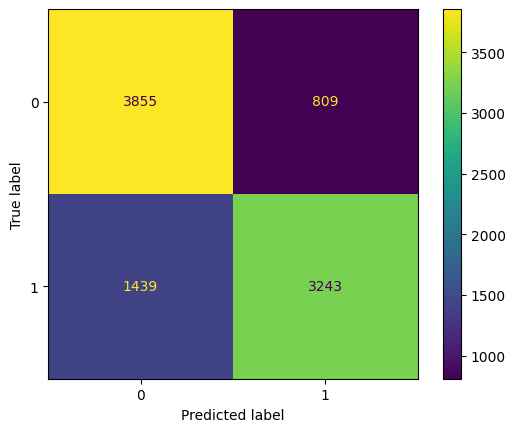

In [59]:
cm = confusion_matrix(y_test, test_class_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

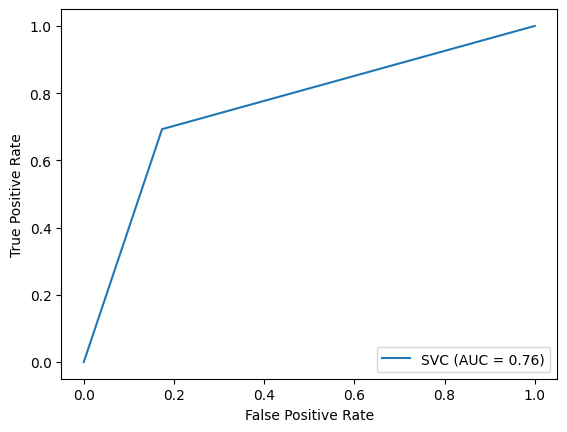

In [60]:
fpr, tpr, thresholds = roc_curve(y_test, test_class_preds)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='SVC')
display.plot()
plt.show()

In [61]:
## From all  the models above, we found that optimized XGBoost model give the best metric.
## Hence, we perfrom cross validation to the model to achieve higher performance.

In [62]:
## Cross validation 
score = cross_val_score(classifier,X,y,cv=10)

In [63]:
score.mean()

0.8418958489676924